# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

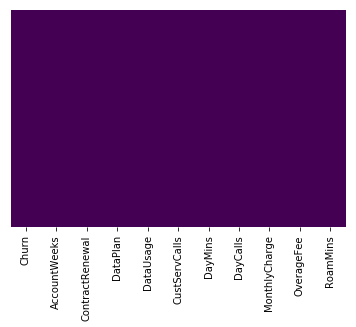

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#this heatmap shows there are no null values in this dataset

In [8]:
data.info()
#confirming the absence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [9]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


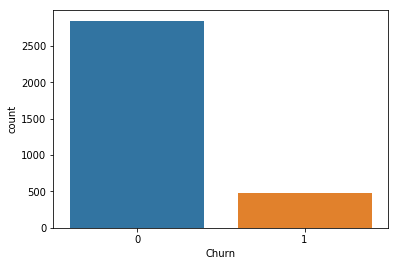

In [10]:
# Our label Distribution (countplot)
sns.countplot(x='Churn',data=data)

In [11]:
data["ContractRenewal"].unique()

array([1, 0], dtype=int64)

In [12]:
data["DataPlan"].unique()

array([1, 0], dtype=int64)

# Exploratory Data Analysis

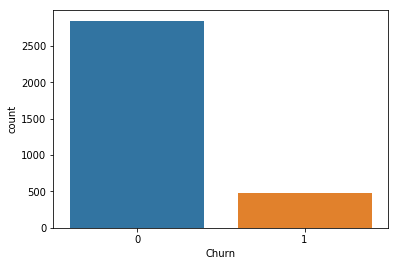

In [13]:
# Our label Distribution (countplot)
sns.countplot(x='Churn',data=data)

C:\Users\IG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


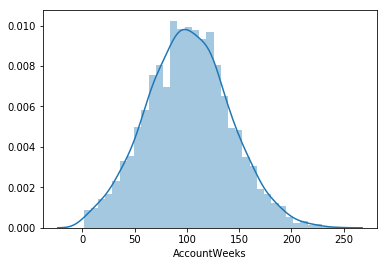

In [14]:
# Example EDA
sns.distplot(data['AccountWeeks'])

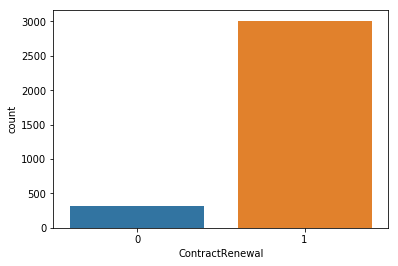

In [15]:
# Example EDA
sns.countplot(x='ContractRenewal',data=data)

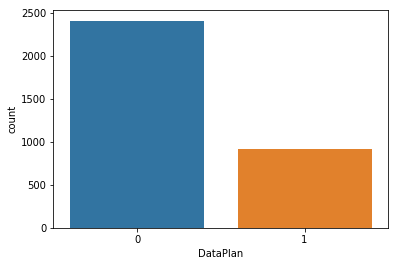

In [16]:
# Example EDA
sns.countplot(x='DataPlan',data=data)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [17]:
# Check for duplicate values

data.duplicated().sum()

#the result shows there are no duplicate values 

0

In [18]:
# feature Scaling

data.columns
#result shows the need for feature scaling

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
df = StandardScaler().fit_transform(data.drop(columns = ["Churn","ContractRenewal","DataPlan"]))

In [21]:
df

array([[ 0.67648946,  1.48020373, -0.42793202, ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  2.26607248, -0.42793202, ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 , -0.64164192, -1.1882185 , ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538, -0.64164192,  0.33235445, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -0.64164192,  0.33235445, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  2.26607248, -1.1882185 , ...,  2.66049626,
         1.28129669,  1.24048169]])

In [22]:
df1 = pd.DataFrame(columns = ('AccountWeeks','CustServCalls', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'), data = df)

In [23]:
df1.head(3)

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121


In [24]:
df1["Churn"] = data["Churn"]

In [25]:
df1["ContractRenewal"] = data["ContractRenewal"]

In [26]:
df1["DataPlan"] = data["DataPlan"]

In [27]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,0,1,1
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,0,1,1
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0,1,0
3,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0,0,0
4,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0,0,0


#There is no need to generate new features?

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Churn', axis=1), df1['Churn'], test_size=0.3, random_state=42)

In [30]:
X_test.shape

(1000, 10)

In [31]:
y_train.shape

(2333,)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

Definition of Models:

According to Microsoft documentation, a machine learning model is a file that has been trained to recognize certain types of patterns.

You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data

In [32]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))

Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression(solver="liblinear", C=10)

In [35]:
model_testing(log)

Training Accuracy:  0.8576939562794685 

Testing Accuracy:  0.867 

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       857
          1       0.60      0.20      0.30       143

avg / total       0.84      0.87      0.84      1000



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
log.intercept_

array([-0.11086042])

In [37]:
log.coef_

array([[ 0.02252864, -0.34624143,  0.65281114,  0.38528946, -0.00320877,
         0.42808604,  0.22277731,  0.27855759, -2.10606099, -0.84696892]])

In [38]:
log.predict_proba(X_train)

array([[0.72396241, 0.27603759],
       [0.95130788, 0.04869212],
       [0.94455033, 0.05544967],
       ...,
       [0.96294855, 0.03705145],
       [0.89667936, 0.10332064],
       [0.99480863, 0.00519137]])

In [39]:
confusion_matrix(y_train, log.predict(X_train))

array([[1937,   56],
       [ 276,   64]], dtype=int64)

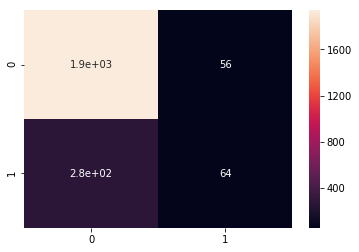

In [40]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
sns.heatmap(c_matrix, annot=True)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [43]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.01, 0.001, 10, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
gsc.best_params_

{'C': 0.01}

In [45]:
gsc.best_score_

0.8594084869267038

In [46]:
gsc.score(X_test, y_test)

0.854

Using Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC(C=10)

In [49]:
model_testing(svc)

Training Accuracy:  0.9524217745392198 

Testing Accuracy:  0.923 

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       857
          1       0.81      0.60      0.69       143

avg / total       0.92      0.92      0.92      1000



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Using Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\IG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
randomf = RandomForestClassifier(n_estimators=200)

In [52]:
model_testing(randomf)

Training Accuracy:  1.0 

Testing Accuracy:  0.933 

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       857
          1       0.89      0.61      0.72       143

avg / total       0.93      0.93      0.93      1000



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
randomf.predict_proba(X_train)

array([[0.985, 0.015],
       [0.995, 0.005],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.995, 0.005]])

In [54]:
confusion_matrix(y_train, randomf.predict(X_train))

array([[1993,    0],
       [   0,  340]], dtype=int64)

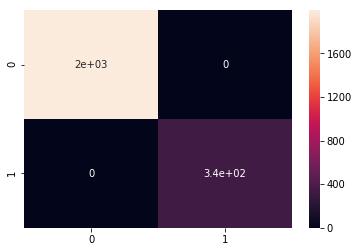

In [55]:
con_matrix = confusion_matrix(y_train, randomf.predict(X_train))
sns.heatmap(con_matrix, annot=True)

Using KNearestNeighbour 

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knnC = KNeighborsClassifier()

In [58]:
model_testing(knnC)

Training Accuracy:  0.9177025289327047 

Testing Accuracy:  0.897 

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       857
          1       0.87      0.33      0.48       143

avg / total       0.89      0.90      0.88      1000



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best performing model is Random Forest 

It has a Training Accuracy of 1.0 and a Testing Accuracy of 0.938

#Hypertuning the model would improve it

In [60]:
#Thanks